# **Advanced Digital Signal Processing (ADSP) Lab - Python Lab Manual**
> **Course Code:** EEE G613 \
**Instructer in Charge:** Dr. Rajesh Kumar Tripathy \
**Teaching Assistant:** Shaswati Dash\
**Lab Technician:** Ramesh Pokanati





**********************************************
**********************************************

# **Experiment No. - 6**

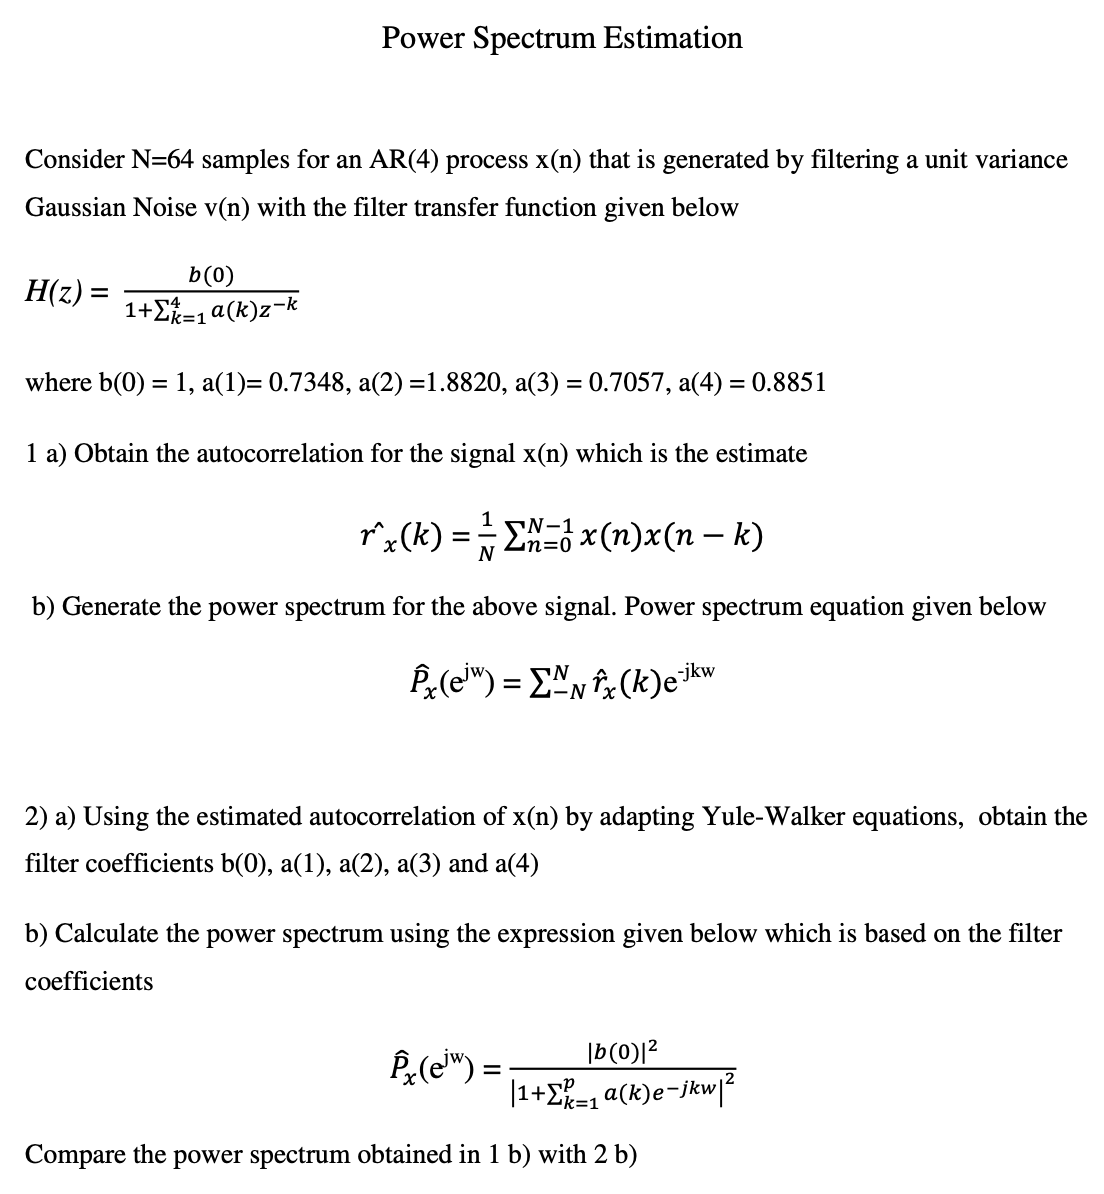

# *Python Code-*

In [6]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

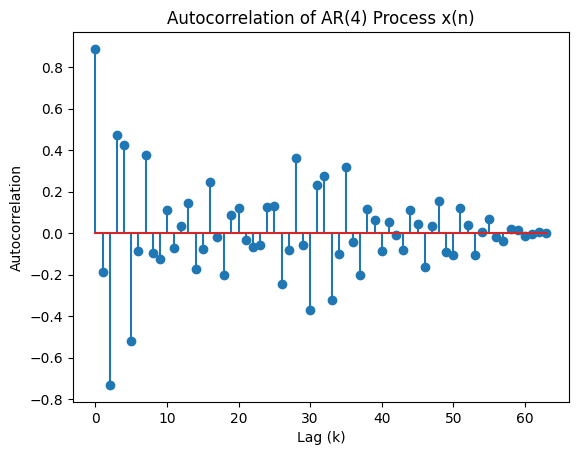

In [7]:
#part-1(a)
#obtain the autocorrelation for the signal x(n)
np.random.seed(0) # Set a random seed for reproducibility
a = [1, 0.7348, 1.8820, 0.7057, 0.8851]
b = [1]
N = 64
v = np.random.rand(N)
x = lfilter(b, a, v) # Filter the random signal
acv = np.correlate(x, x, mode="full") # Calculate the autocorrelation
acv = acv[N - 1:]
acv = acv/100
plt.stem(acv)
plt.xlabel('Lag (k)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of AR(4) Process x(n)')
plt.show()

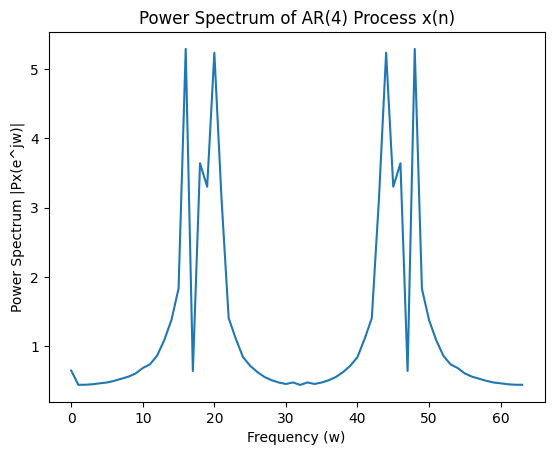

In [8]:
#part-1(b)
#generate the power spectrum for the above signal
psd = np.fft.fft(acv)
plt.figure()
plt.plot(np.abs(psd))
plt.xlabel('Frequency (w)')
plt.ylabel('Power Spectrum |Px(e^jw)|')
plt.title('Power Spectrum of AR(4) Process x(n)')
plt.show()

b(0): 1
a(1): 0.30600956209319
a(2): 1.1447067214482551
a(3): 0.024655377929276485
a(4): 0.30593055518463347


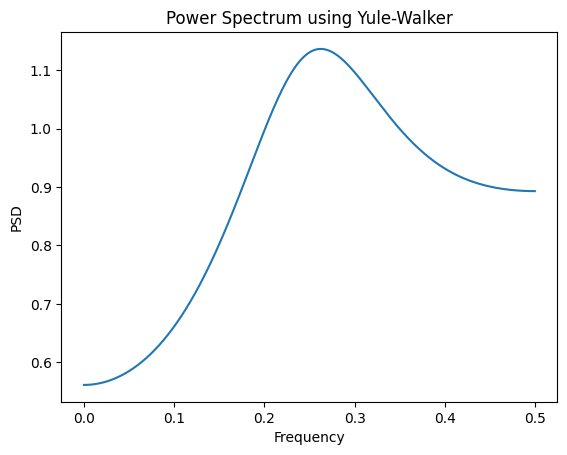

In [9]:
#part-2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
np.random.seed(0) # Set a random seed for reproducibility
a = [1, 0.7348, 1.8820, 0.7057, 0.8851]
b = [1]
N = 64
v = np.random.rand(N)
x = lfilter(b, a, v) # Filter the random signal
acv = np.correlate(x, x, mode='full') # Calculate the autocorrelation
acv = acv[N - 1:]
M = 4
R = np.array([
[acv[0], acv[1], acv[2], acv[3]],
[acv[1], acv[0], acv[1], acv[2]],
[acv[2], acv[1], acv[0], acv[1]],
[acv[3], acv[2], acv[1], acv[0]]
])
bmat = np.array([-acv[1], -acv[2], -acv[3], -acv[4]])
coeff = np.linalg.solve(R, bmat)
print(f'b(0): {b[0]}')
for i in range(M):
  print(f'a({i + 1}): {coeff[i]}')
Nfft = 2048 # Number of points for the frequency response
W, H = freqz(b, coeff, worN=Nfft)
plt.figure()
plt.plot(W / (2 * np.pi), abs(H))
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.title("Power Spectrum using Yule-Walker")
plt.show()